In [1]:
# Import modules
import pandas as pd



# Import custom module
import sys
import os
sys.path.insert(0,os.path.abspath("../scripts"))
import eda as eda
import importlib
importlib.reload(eda)

<module 'eda' from 'c:\\Users\\HP\\Desktop\\TenX\\insurance_data_analysis\\scripts\\eda.py'>

In [2]:
# Load the dataset
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')

C:\Users\HP\AppData\Local\Temp\ipykernel_12160\1983549020.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|')


In [3]:
# Checking the data types of column 32 and 37
print(df.iloc[:, [32, 37]].dtypes)


CapitalOutstanding    object
CrossBorder           object
dtype: object


In [4]:
# Avoiding automatic inference of data types for columns 32 and 37
dtype_spec = {32: 'object', 37: 'object'}  
df = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', dtype=dtype_spec)


In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


Data Summarization

In [6]:
# Descriptive statistics for numerical columns
print(eda.describe_numerical_columns(df))

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [7]:
# Check data types
print(eda.check_data_types(df))

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

Data Quality Assessment

In [8]:
# Check for missing values
print(eda.missing_values(df))

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

Univariate Analysis

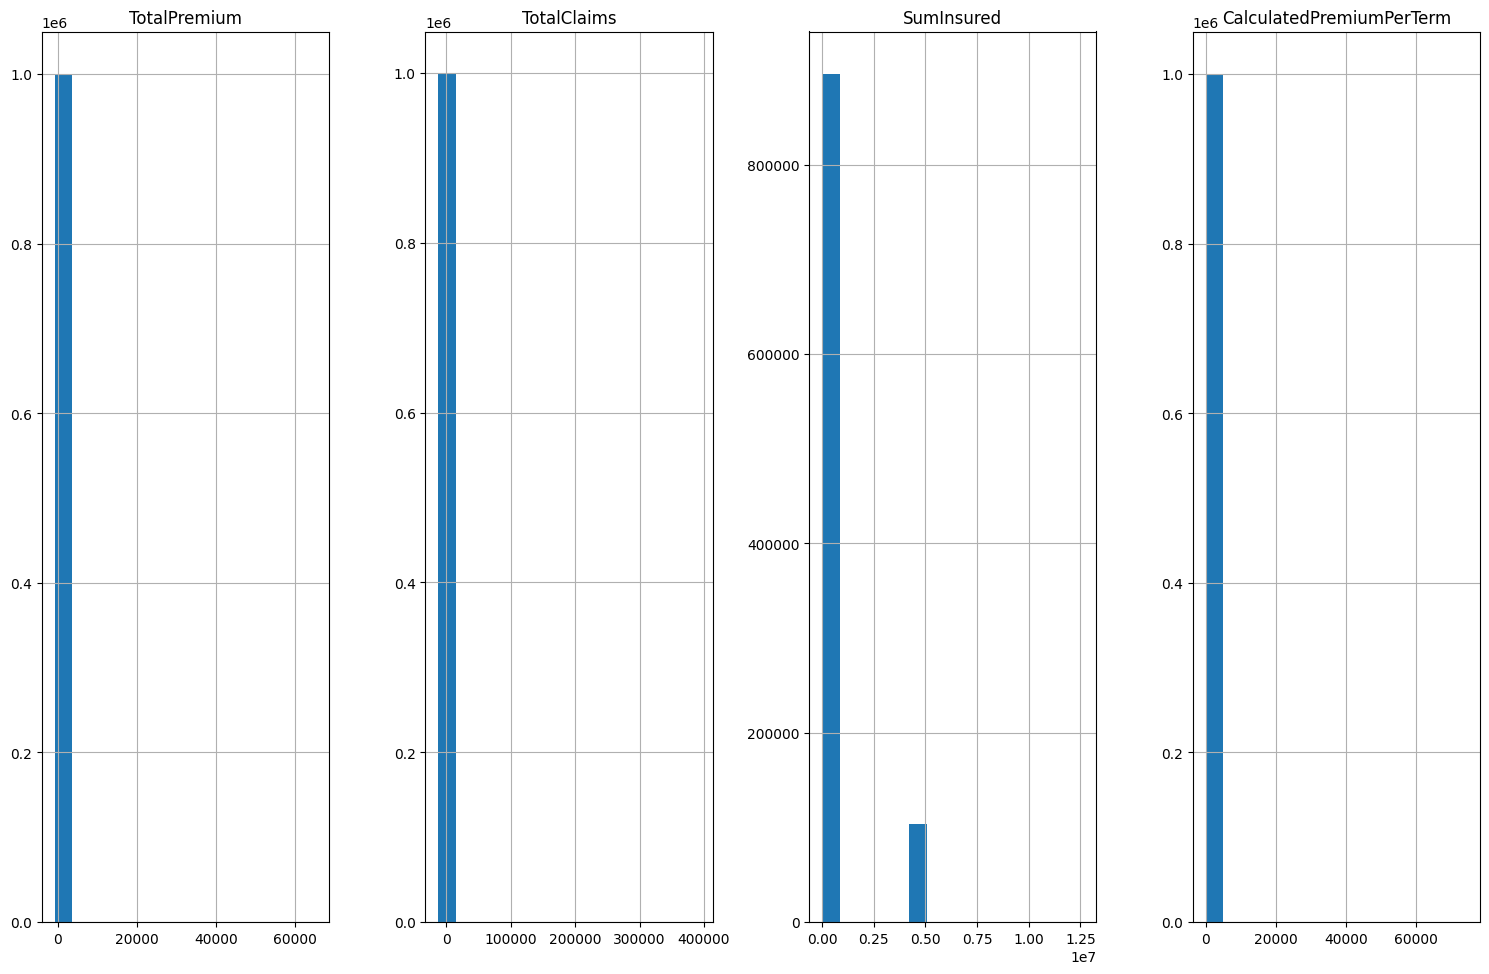

In [9]:
# Histograms for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
eda.plot_numerical_histogram(df, numerical_columns)

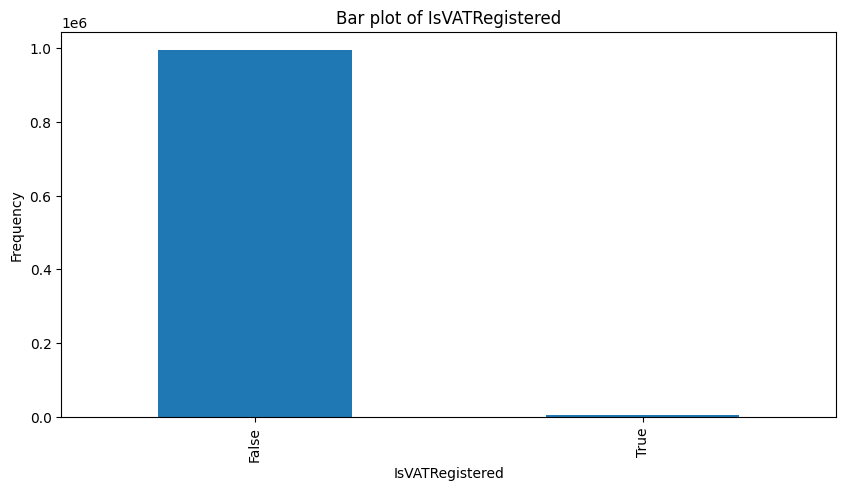

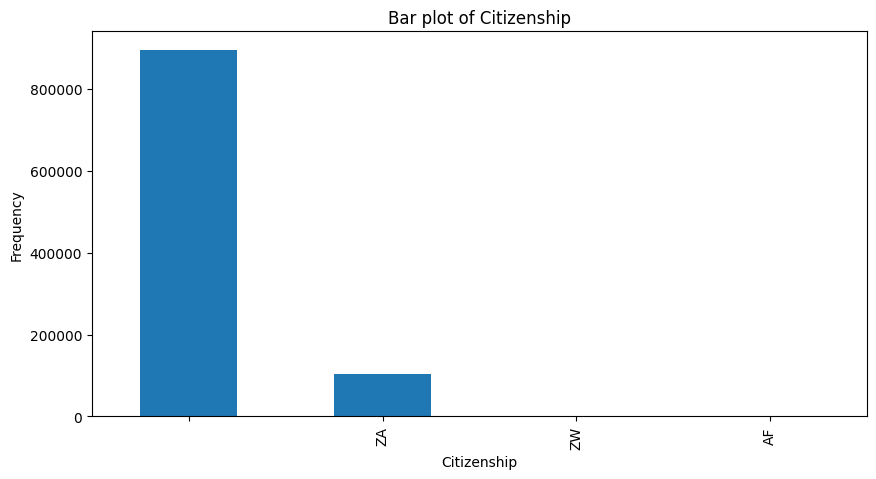

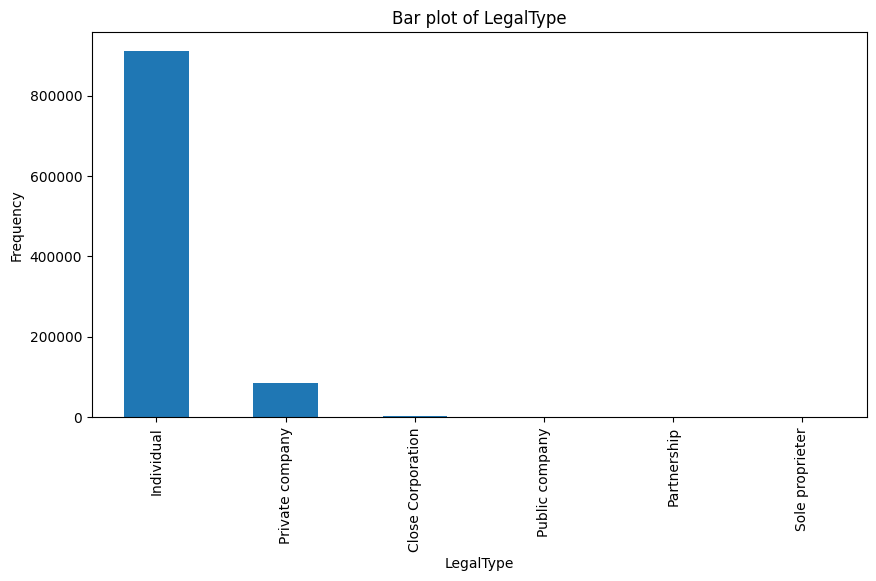

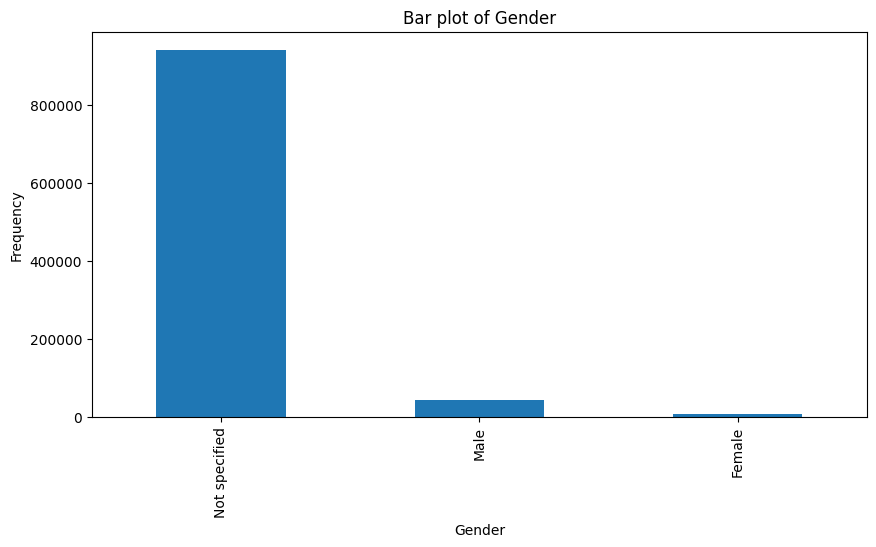

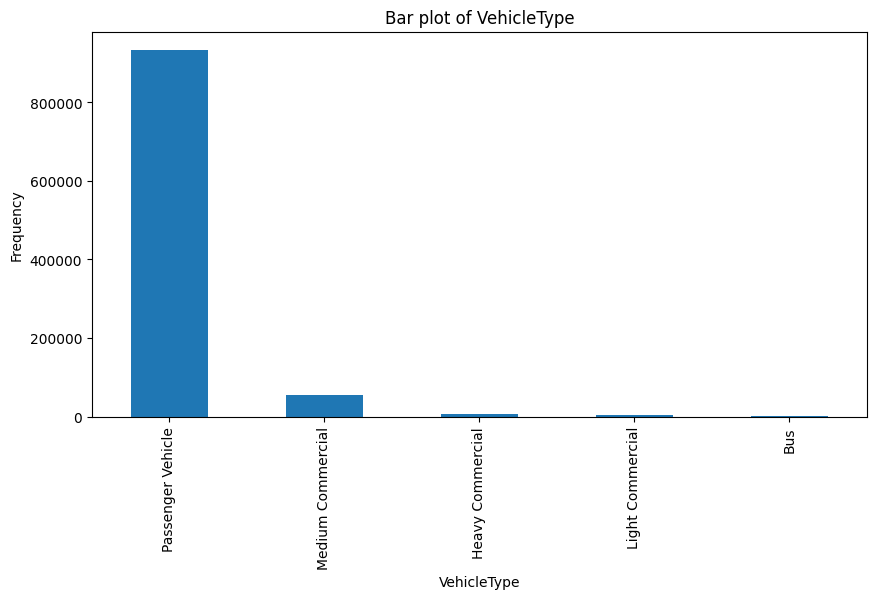

In [10]:
# Bar charts for categorical columns
categorical_columns = ['IsVATRegistered', 'Citizenship', 'LegalType', 'Gender', 'VehicleType']
eda.plot_categorical_bar(df, categorical_columns)

Bivariate Analysis

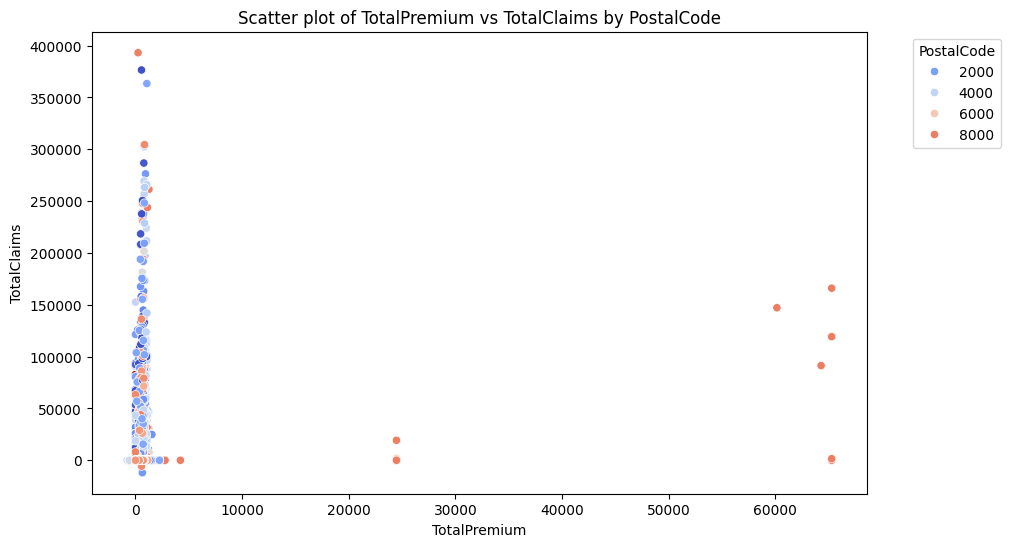

In [11]:
# Scatter plot of TotalPremium vs TotalClaims
eda.plot_scatter_by_zipcode(df, 'TotalPremium', 'TotalClaims', 'PostalCode')

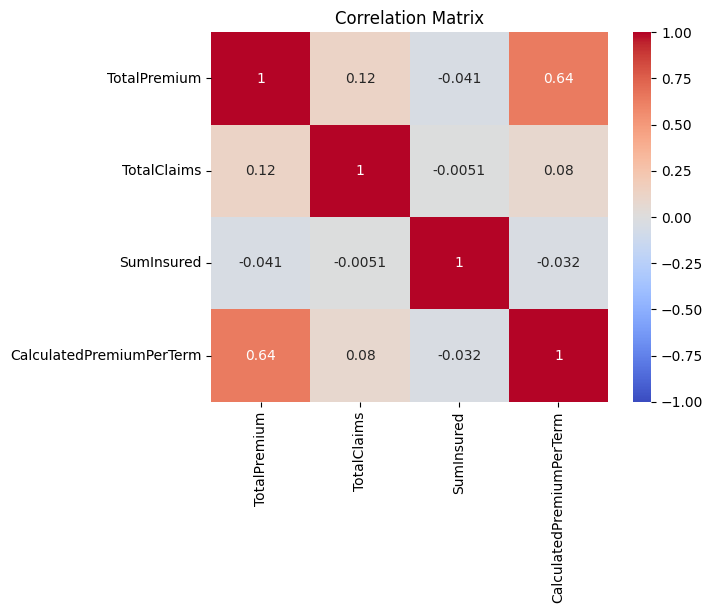

In [12]:
# Correlation matrix for numerical variables
correlation_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
eda.correlation_matrix(df, correlation_columns)


Data Comparison

c:\Users\HP\Desktop\TenX\insurance_data_analysis\scripts\eda.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=x_col, y=y_col, hue=hue, ci=None)


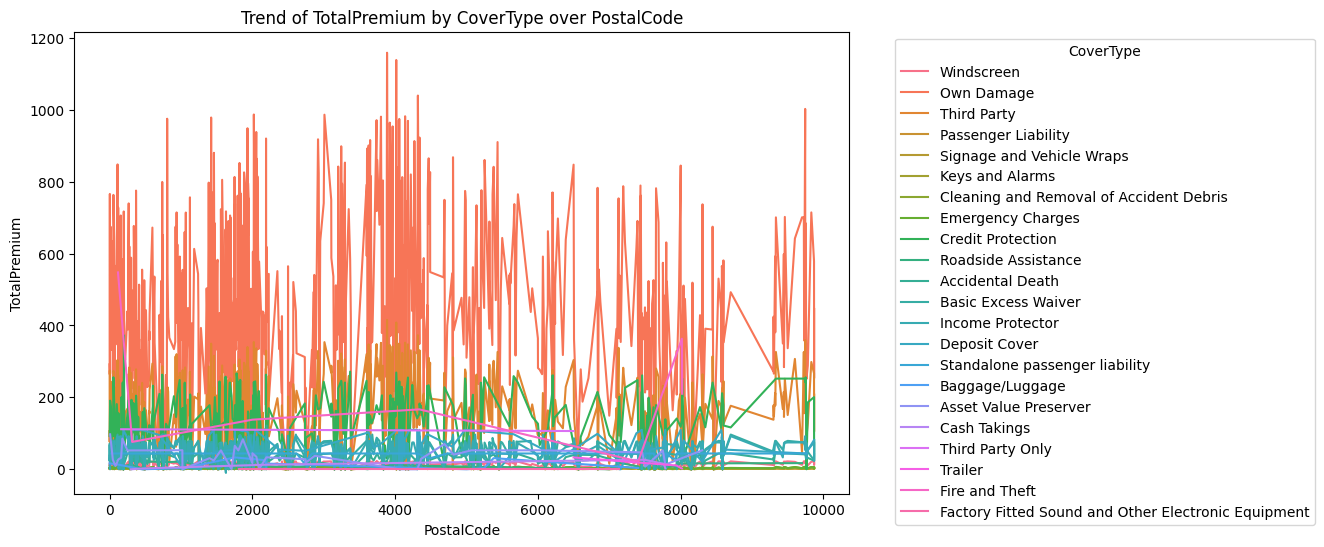

c:\Users\HP\Desktop\TenX\insurance_data_analysis\scripts\eda.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=x_col, y=y_col, hue=hue, ci=None)


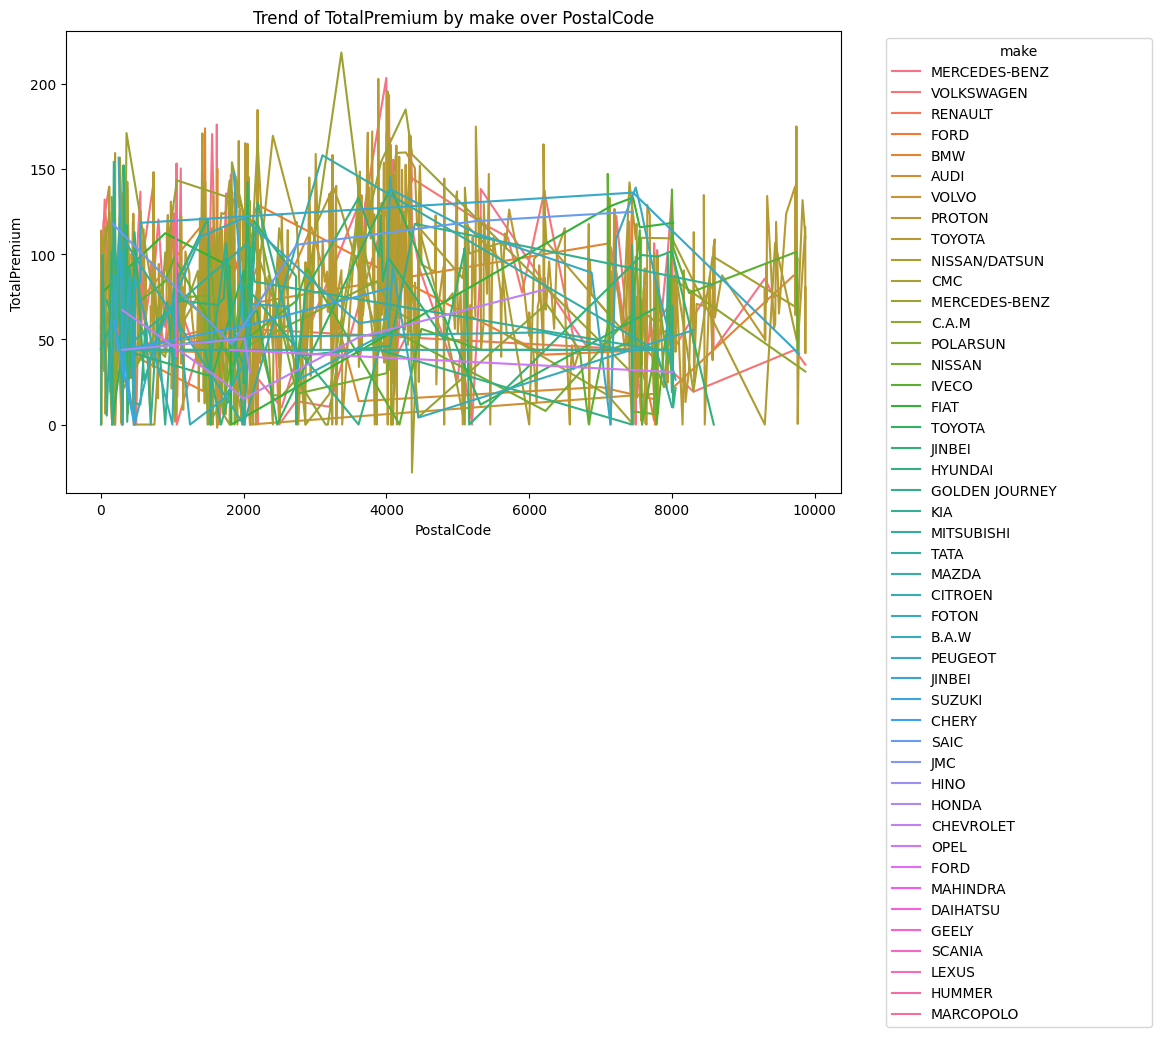

c:\Users\HP\Desktop\TenX\insurance_data_analysis\scripts\eda.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x=x_col, y=y_col, hue=hue, ci=None)


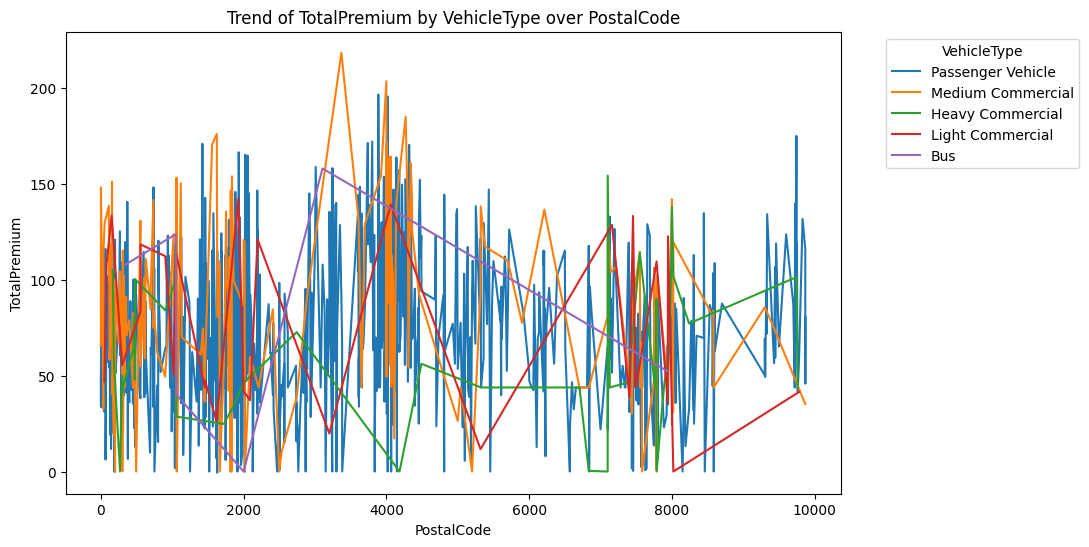

In [13]:
# Trend of TotalPremium by CoverType over PostalCode
eda.plot_trend_over_geography(df, 'PostalCode', 'TotalPremium', 'CoverType', 'PostalCode')

# Trend of TotalPremium by Make over PostalCode
eda.plot_trend_over_geography(df, 'PostalCode', 'TotalPremium', 'make', 'PostalCode')

# Trend of TotalPremium by VehicleType over PostalCode (additional column)
eda.plot_trend_over_geography(df, 'PostalCode', 'TotalPremium', 'VehicleType', 'PostalCode')


Outlier Detection

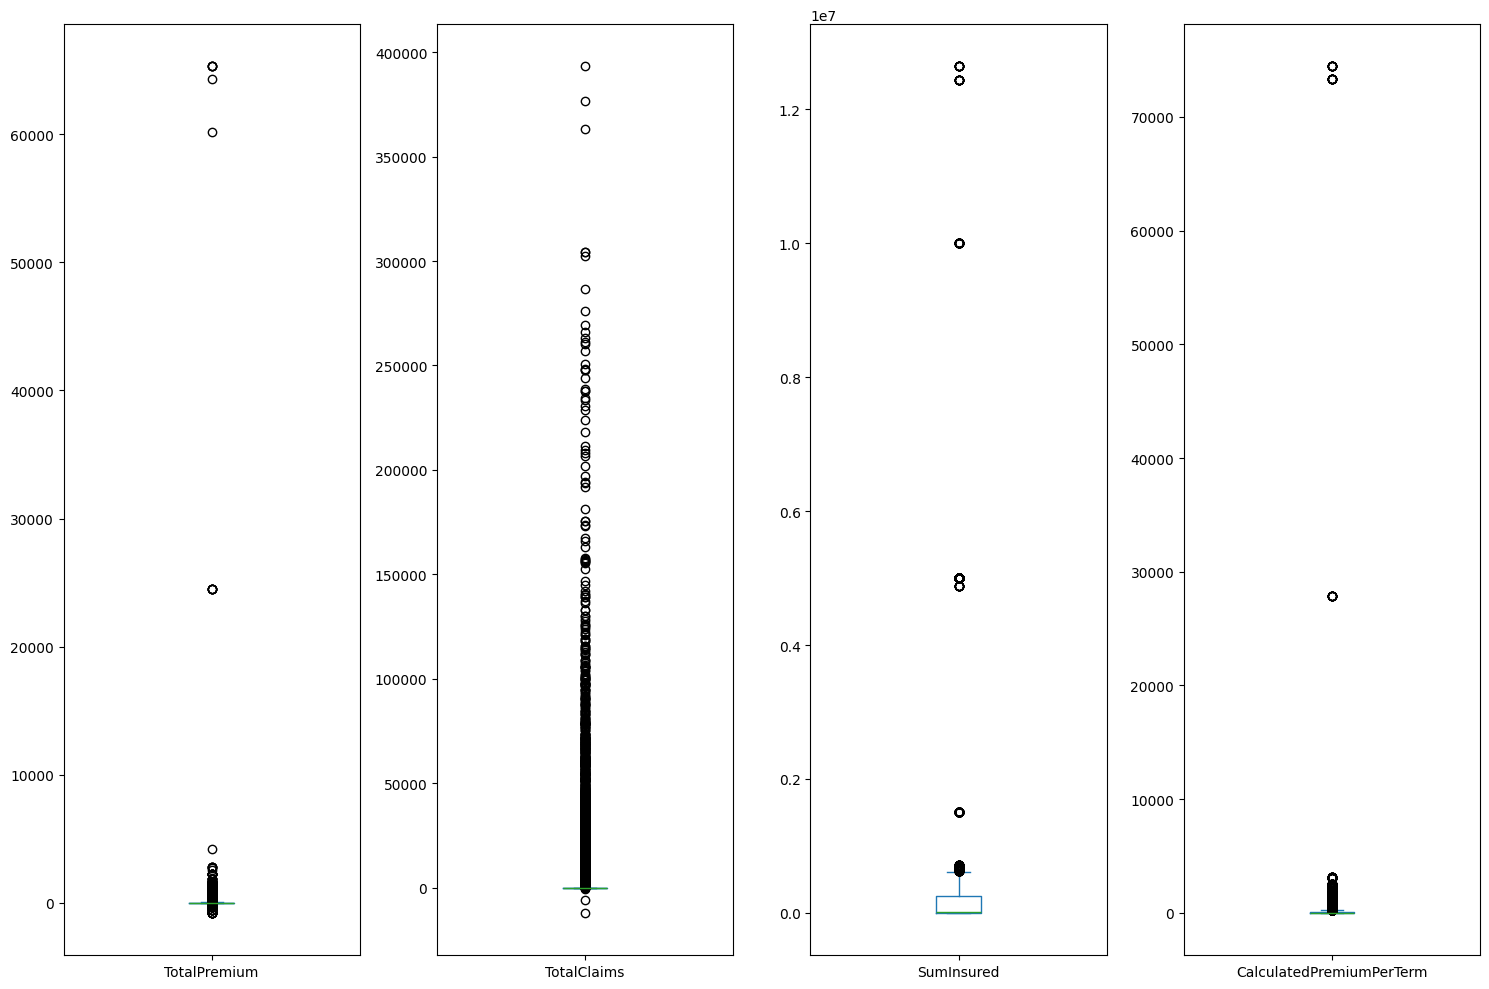

In [14]:
# Box plot to detect outliers
eda. box_plot(df, numerical_columns)

Advanced Visualizations

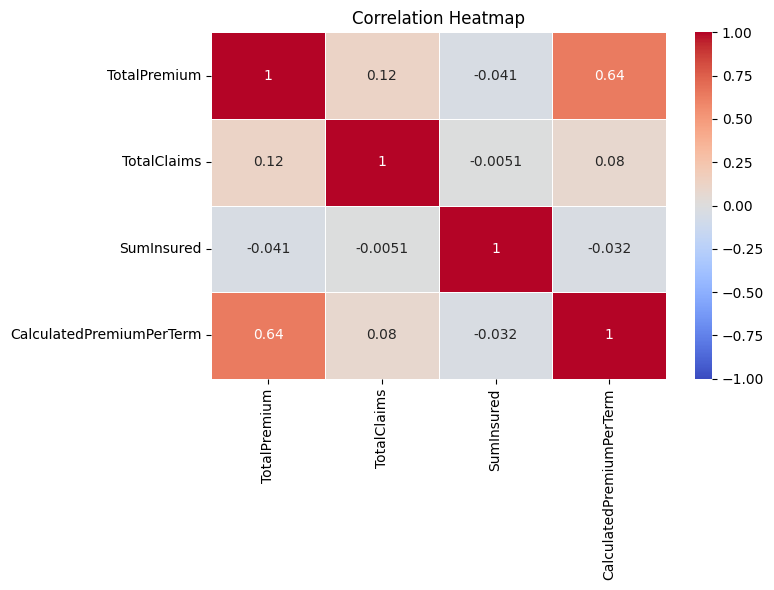

In [15]:
# Heatmap of correlations
subset_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
eda. plot_correlation_heatmap(df, subset_columns=subset_columns)

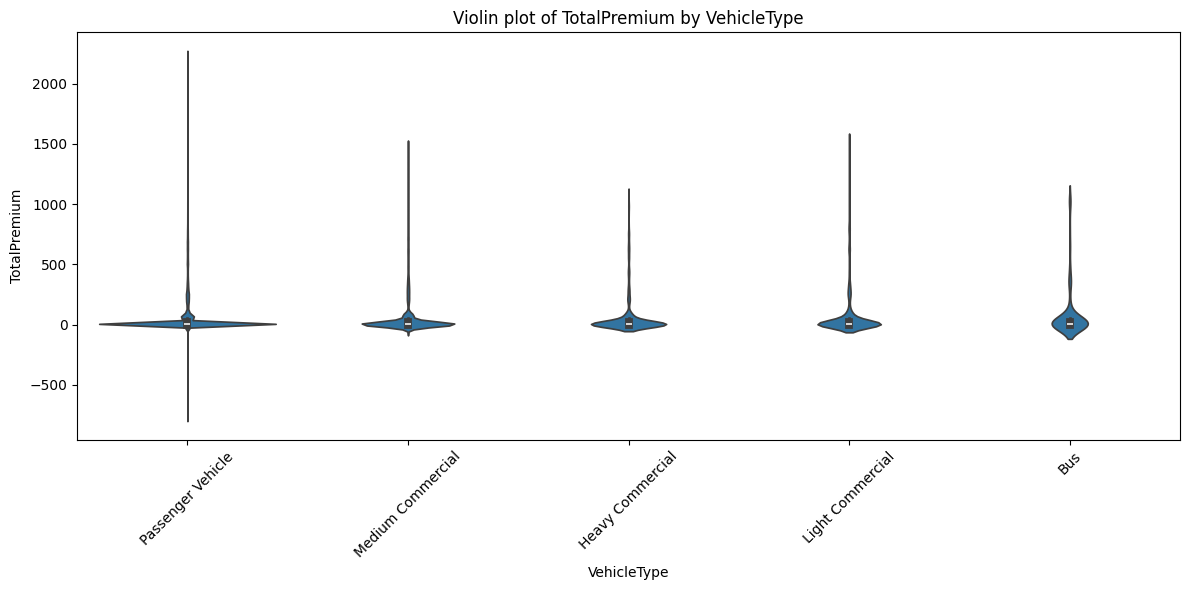

In [16]:
# Violin plot for TotalPremium by VehicleType
eda.plot_violin(df, x_col='VehicleType', y_col='TotalPremium')

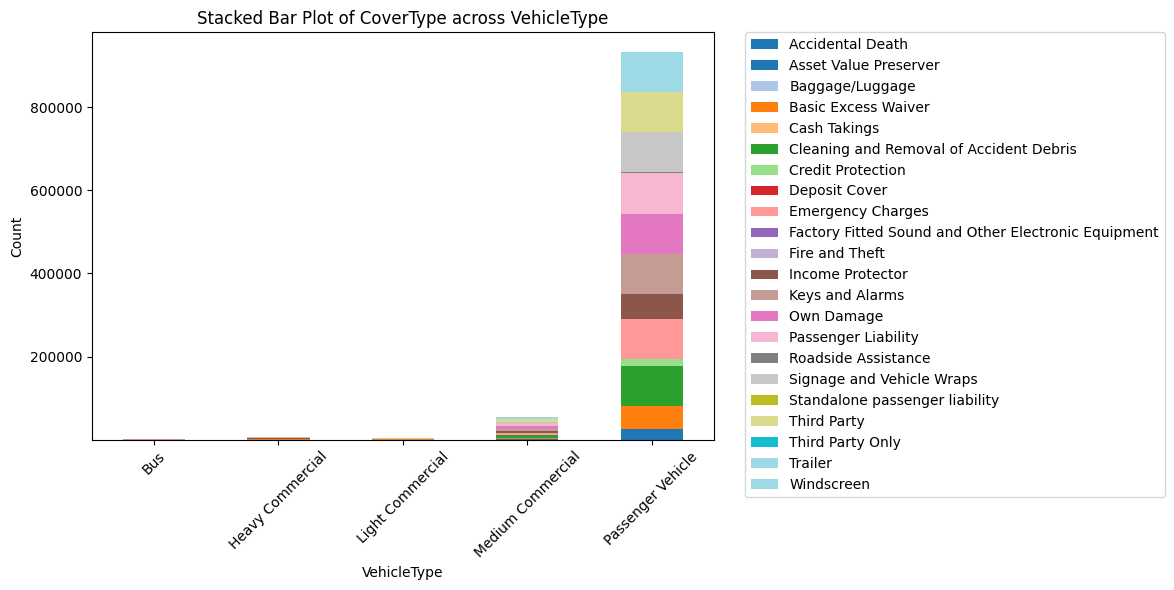

In [17]:
# Stacked bar plot showing distribution of CoverType across VehicleType
eda.plot_stacked_bar(df, 'VehicleType', 'TotalPremium', 'CoverType')
